In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load data
df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Data/cell_cycle_tidied.csv")

# Combine 'M' and 'G2' into one class, if desired (optional)
df['phase'] = df['phase'].replace({'M': 'G2'})

# Define features and target
X = df.drop(columns=['phase', 'age', 'PHATE_1', 'PHATE_2'])
y = df['phase']

In [4]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=949, stratify=y)

# Fit multinomial logistic regression with regularization
logreg = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',  # good for multinomial
    max_iter=1000,
    C=1.0,  # inverse of regularization strength
    random_state=949
)
logreg.fit(X_train, y_train)

# Predict
y_train_pred = logreg.predict(X_train)
y_test_pred = logreg.predict(X_test)


/Users/mariahloehr/IICD/IICD/sklearn-env/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1264: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Evaluation
# Output results
print("=== Training Set ===")
print("Overall Accuracy:", accuracy_score(y_train, y_train_pred))

df_train = pd.DataFrame({'true': y_train, 'pred': y_train_pred})
accuracy_per_phase_train = df_train.groupby('true').apply(lambda x: accuracy_score(x['true'], x['pred']))

print("Accuracy per phase (Train):")
print(accuracy_per_phase_train)

print("\n=== Test Set ===")
print("Overall Accuracy:", accuracy_score(y_test, y_test_pred))

df_test = pd.DataFrame({'true': y_test, 'pred': y_test_pred})
accuracy_per_phase_test = df_test.groupby('true').apply(lambda x: accuracy_score(x['true'], x['pred']))

print("\nAccuracy per phase (Test):")
print(accuracy_per_phase_test)

print("\n=== Confusion Matrix (Test Set) ===")
print(confusion_matrix(y_test, y_test_pred))

In [4]:
# save results
# === Load existing results ===
results_df = pd.read_csv("/Users/mariahloehr/IICD/IICD/Bar Plot/classification_results.csv", index_col=0)

# === Compute accuracy ===
from sklearn.metrics import accuracy_score

overall_acc = accuracy_score(y_test, y_test_pred)

df_test = pd.DataFrame({'true': y_test, 'pred': y_test_pred})
acc_per_phase = df_test.groupby('true').apply(lambda x: accuracy_score(x['true'], x['pred']))

# === Insert values ===
model_name = "MLR (full)"
results_df.loc[model_name, 'Overall'] = overall_acc

# Set per-phase accuracies
for phase in ['G0', 'G1', 'G2', 'S']:
    if phase in acc_per_phase.index:
        results_df.loc[model_name, phase] = acc_per_phase[phase]

# === Save updated file ===
results_df.to_csv("/Users/mariahloehr/IICD/IICD/Bar Plot/classification_results.csv")

/var/folders/1s/bvxr71hj0hqgyk_jk6k7wkm80000gn/T/ipykernel_44026/3233113085.py:11: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  acc_per_phase = df_test.groupby('true').apply(lambda x: accuracy_score(x['true'], x['pred']))


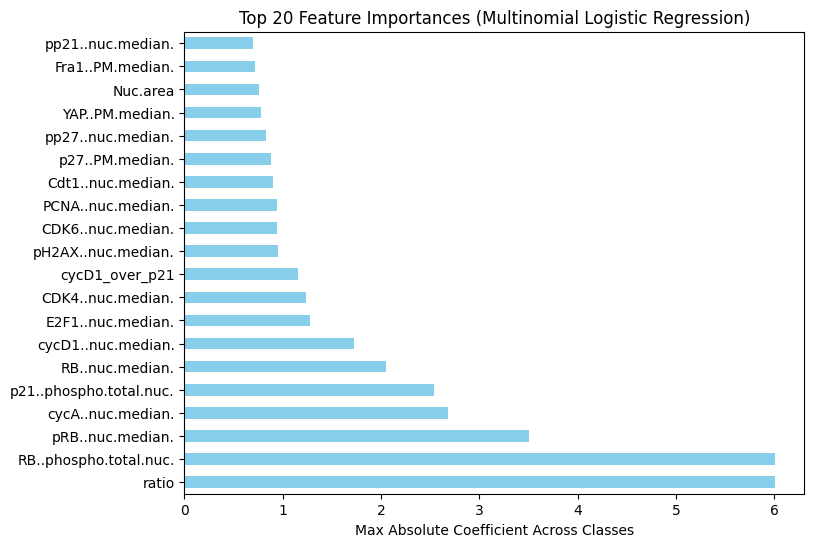

In [7]:
coef_abs = np.abs(logreg.coef_)

# Aggregate importance across classes by taking max absolute coefficient per feature
feature_importance = pd.Series(coef_abs.max(axis=0), index=X_train.columns)

# Sort descending and select top 20
top20_features = feature_importance.sort_values(ascending=False).head(20)

# Plot
top20_features.plot(
    kind='barh',
    figsize=(8, 6),
    title='Top 20 Feature Importances (Multinomial Logistic Regression)',
    color='skyblue'
)
#plt.gca().invert_yaxis()  # Largest on top
plt.xlabel('Max Absolute Coefficient Across Classes')
plt.show()

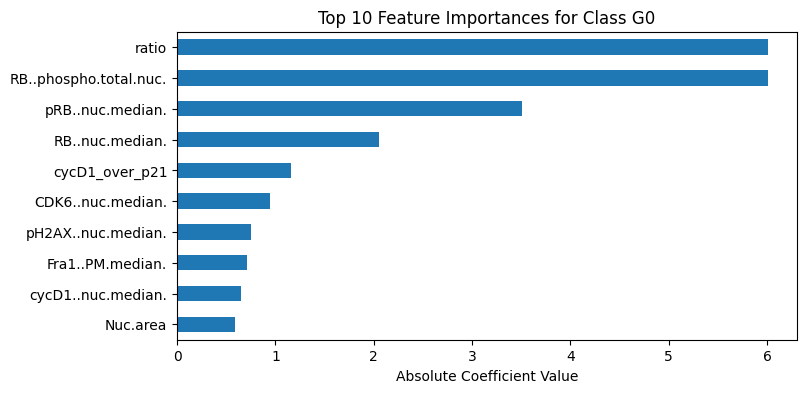

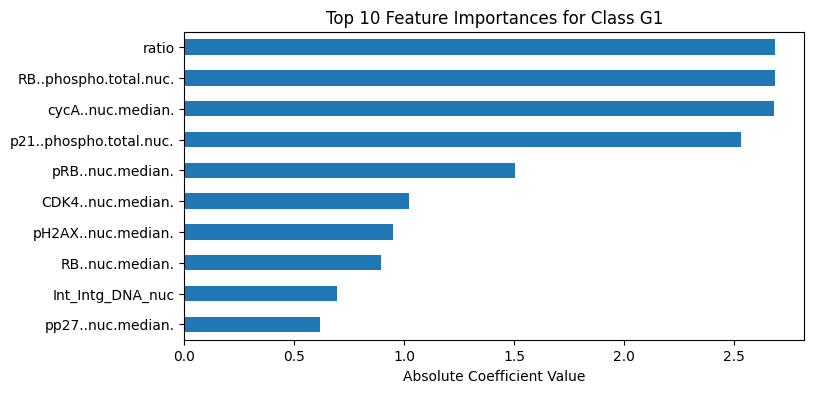

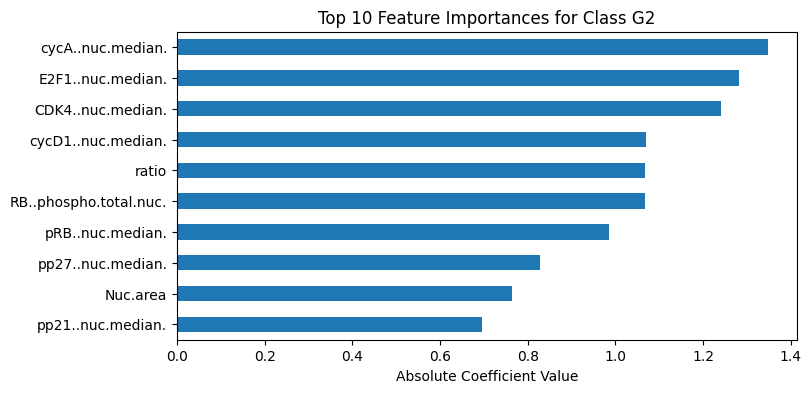

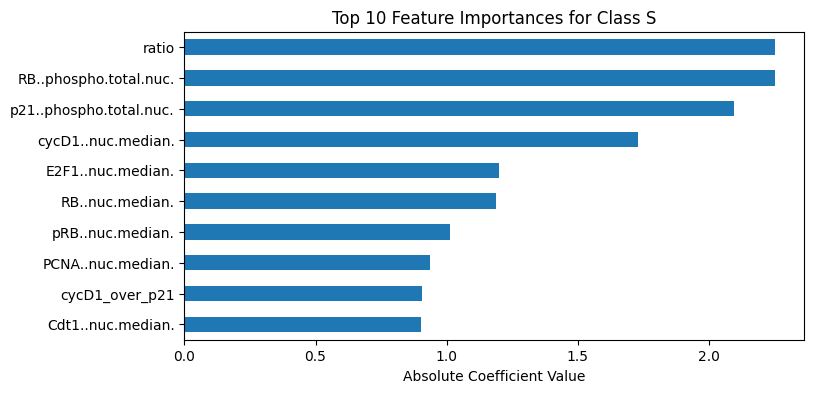

In [ ]:
coef_abs = np.abs(logreg.coef_)

# importance across classes by taking max absolute coefficient per feature
feature_importance = pd.Series(coef_abs.max(axis=0), index=X_train.columns)

# Sort descending and select top 20
top20_features = feature_importance.sort_values(ascending=False).head(20)

# Plot
top20_features.plot(
    kind='barh',
    figsize=(8, 6),
    title='Top 20 Feature Importances (Multinomial Logistic Regression)',
    color='skyblue'
)
plt.gca().invert_yaxis()  # Largest on top
plt.xlabel('Max Absolute Coefficient Across Classes')
plt.show()